In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
%matplotlib inline

In [47]:
df= pd.read_csv('delivery_times(1).csv')

In [48]:
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [49]:
df.tail()

,DeliveryTime,SortingTime
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [50]:
df.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
DeliveryTime    21 non-null float64
SortingTime     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


# EDA

In [52]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


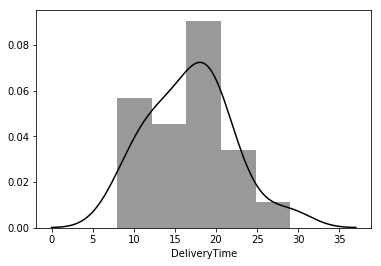

In [55]:
sns.distplot(df['DeliveryTime'],color='black')

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


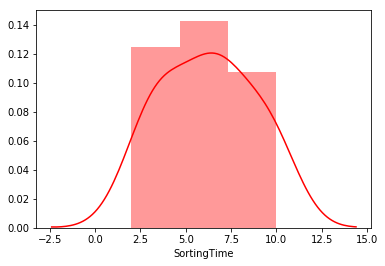

In [56]:
sns.distplot(df['SortingTime'],color='red')

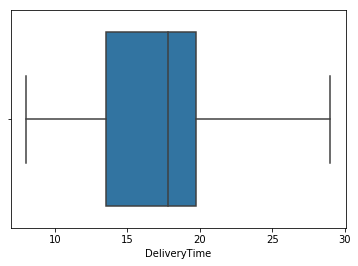

In [57]:
sns.boxplot(df['DeliveryTime'])

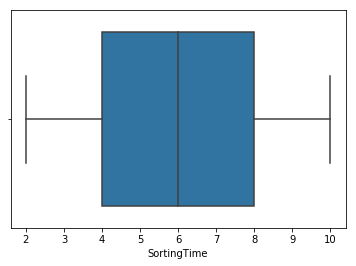

In [59]:
sns.boxplot(df['SortingTime'])

Text(0,0.5,'SortingTime')

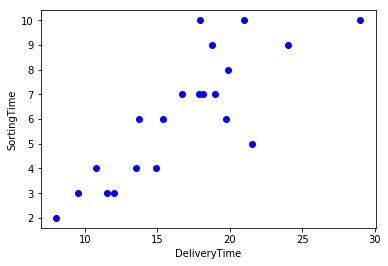

In [60]:
plt.plot(df['DeliveryTime'],df['SortingTime'],'bo')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [61]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


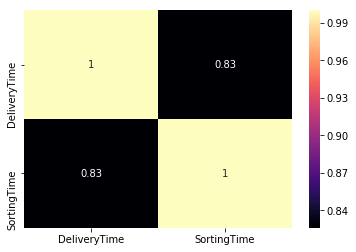

In [62]:
sns.heatmap(df.corr(),cmap='magma',annot=True)


In [63]:
import statsmodels.formula.api as smf

In [64]:
model=smf.ols('SortingTime~DeliveryTime',data=df).fit()

In [65]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [67]:
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 May 2020   Prob (F-statistic):           3.98e-06
Time:                        15:56:12   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model.conf_int(0.05) # 95% confidence level

,0,1
Intercept,-3.130058,1.616712
DeliveryTime,0.278169,0.549318


In [70]:
prediction = model.predict(df)

In [71]:
prediction

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

Text(0,0.5,'SortingTime')

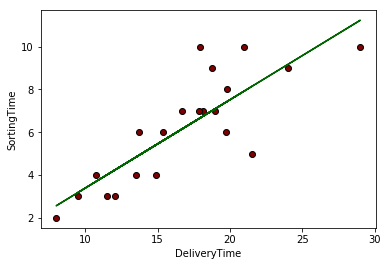

In [72]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],c='maroon',edgecolors='black')
plt.plot(df['DeliveryTime'],prediction,color='darkgreen')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [73]:
prediction.corr(df['SortingTime'])

0.8259972607955326

In [74]:
# [LOG TRANSFORMATION] Transforming variables for accuracy 

model2 = smf.ols('SortingTime~np.log(DeliveryTime)',data=df).fit()
type(model2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [75]:
model2.params

Intercept              -12.499233
np.log(DeliveryTime)     6.735548
dtype: float64

In [76]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.59e-06
Time:                        16:01:18   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model.conf_int(0.01)  # 99% confidence level

,0,1
Intercept,-4.000831,2.487484
DeliveryTime,0.228428,0.599059


In [78]:
prediction2 = model2.predict(df)

In [79]:
prediction2.corr(df['SortingTime'])
prediction2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

Text(0,0.5,'Sortingtime')

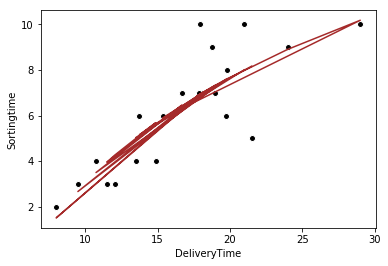

In [81]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='black',edgecolors='white')
plt.plot(df['DeliveryTime'],prediction2,color='brown')
plt.xlabel('DeliveryTime')
plt.ylabel('Sortingtime')

In [82]:
model3 = smf.ols('np.log(SortingTime)~DeliveryTime',data=df).fit()
type(model3)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [83]:
model3.params

Intercept       0.437237
DeliveryTime    0.076901
dtype: float64

In [84]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Sat, 30 May 2020   Prob (F-statistic):           2.64e-06
Time:                         16:05:46   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model3.conf_int(0.01)  #99% Confidence interval

,0,1
Intercept,-0.147491,1.021964
DeliveryTime,0.043499,0.110302


In [86]:
prediction3 = model3.predict(df)
prediction3

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [87]:
predict_3 = np.exp(prediction3)
predict_3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [93]:
predict_3.corr(df['SortingTime'])

0.7472768828616799

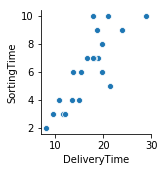

In [94]:
sns.pairplot(data=df,x_vars='DeliveryTime',y_vars='SortingTime')

Text(0,0.5,'SortingTime')

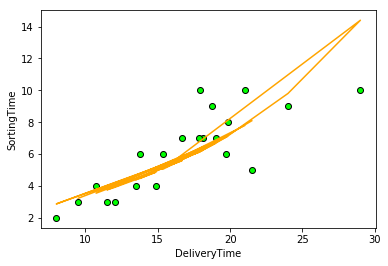

In [95]:
plt.scatter(df['DeliveryTime'],df['SortingTime'],color='lime',edgecolors='black')
plt.plot(df['DeliveryTime'],predict_3,color='orange')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [96]:
a = predict_3 -df['SortingTime']

In [97]:
# Getting residuals of the entire data set by considering model3 as it has the highest root mean squared value

t_resid = model3.resid_pearson
t_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0,0.5,'standardized residual')

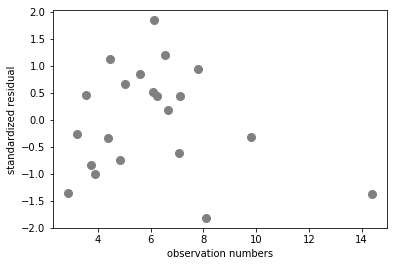

In [98]:
plt.plot(predict_3,t_resid,'o',color='grey',lw=1,markersize='8',)
plt.xlabel('observation numbers')
plt.ylabel('standardized residual')

Text(0,0.5,'Actual')

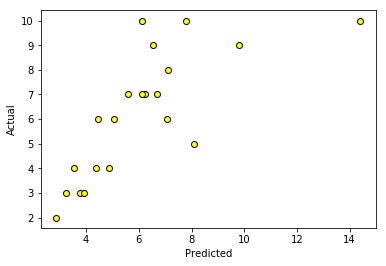

In [99]:
# Predicted vs actual values

plt.scatter(predict_3,df['SortingTime'],color='yellow',edgecolors='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0,0.5,'Actual')

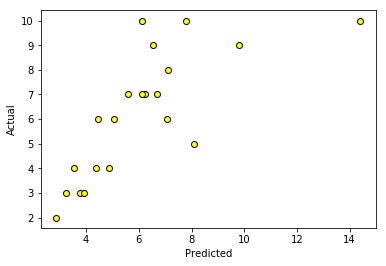

In [100]:
# Predicted vs actual values

plt.scatter(predict_3,df['SortingTime'],color='yellow',edgecolors='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [101]:
# Quadratic model

df['DeliveryTime_sq'] = df['DeliveryTime']*df['DeliveryTime']
df.head()

,DeliveryTime,SortingTime,DeliveryTime_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000


In [103]:
model4 = smf.ols('SortingTime~DeliveryTime+DeliveryTime_sq',data=df).fit()
model4.params

Intercept         -4.640096
DeliveryTime       0.894094
DeliveryTime_sq   -0.013646
dtype: float64

In [104]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.19e-05
Time:                        16:15:31   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.6401      2.864     -1.620      0.123     -10.657       1.377
DeliveryTime        0.8941      0.333      2.685      0.015       0.194       1.594
DeliveryTime_sq    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
prediction4 =  model4.predict(df)
prediction4

0     8.117840
1     4.943126
2     7.695333
3     8.957865
4     9.812054
5     5.868861
6     7.421359
7     2.622214
8     6.991761
9     7.326623
10    7.723651
11    3.394409
12    6.476673
13    3.837256
14    4.140943
15    5.642525
16    5.073684
17    7.076326
18    1.639290
19    6.963305
20    8.274902
dtype: float64

In [106]:
model4.conf_int(0.05)

,0,1
Intercept,-10.657470,1.377279
DeliveryTime,0.194383,1.593804
DeliveryTime_sq,-0.033167,0.005874


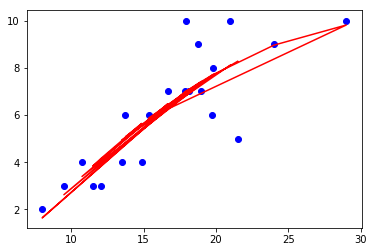

In [107]:
plt.scatter(df['DeliveryTime'],df['SortingTime'],c="b")
plt.plot(df['DeliveryTime'],prediction4,"r")

In [112]:
# Regression Evaluation Metrics

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [114]:
mae = metrics.mean_absolute_error(df['SortingTime'], predict_3)
mae

1.3869056089088005

In [115]:
mse = metrics.mean_squared_error(df['SortingTime'], predict_3)
mse

3.211783707071623

In [117]:
rmse = np.sqrt(metrics.mean_squared_error(df['SortingTime'], predict_3))
rmse

1.7921450016869793